Please upload an image file (e.g., jpg, png):


Saving rgb_dog.jpg to rgb_dog.jpg
Output saved as reduced_resolution_3x3.jpg


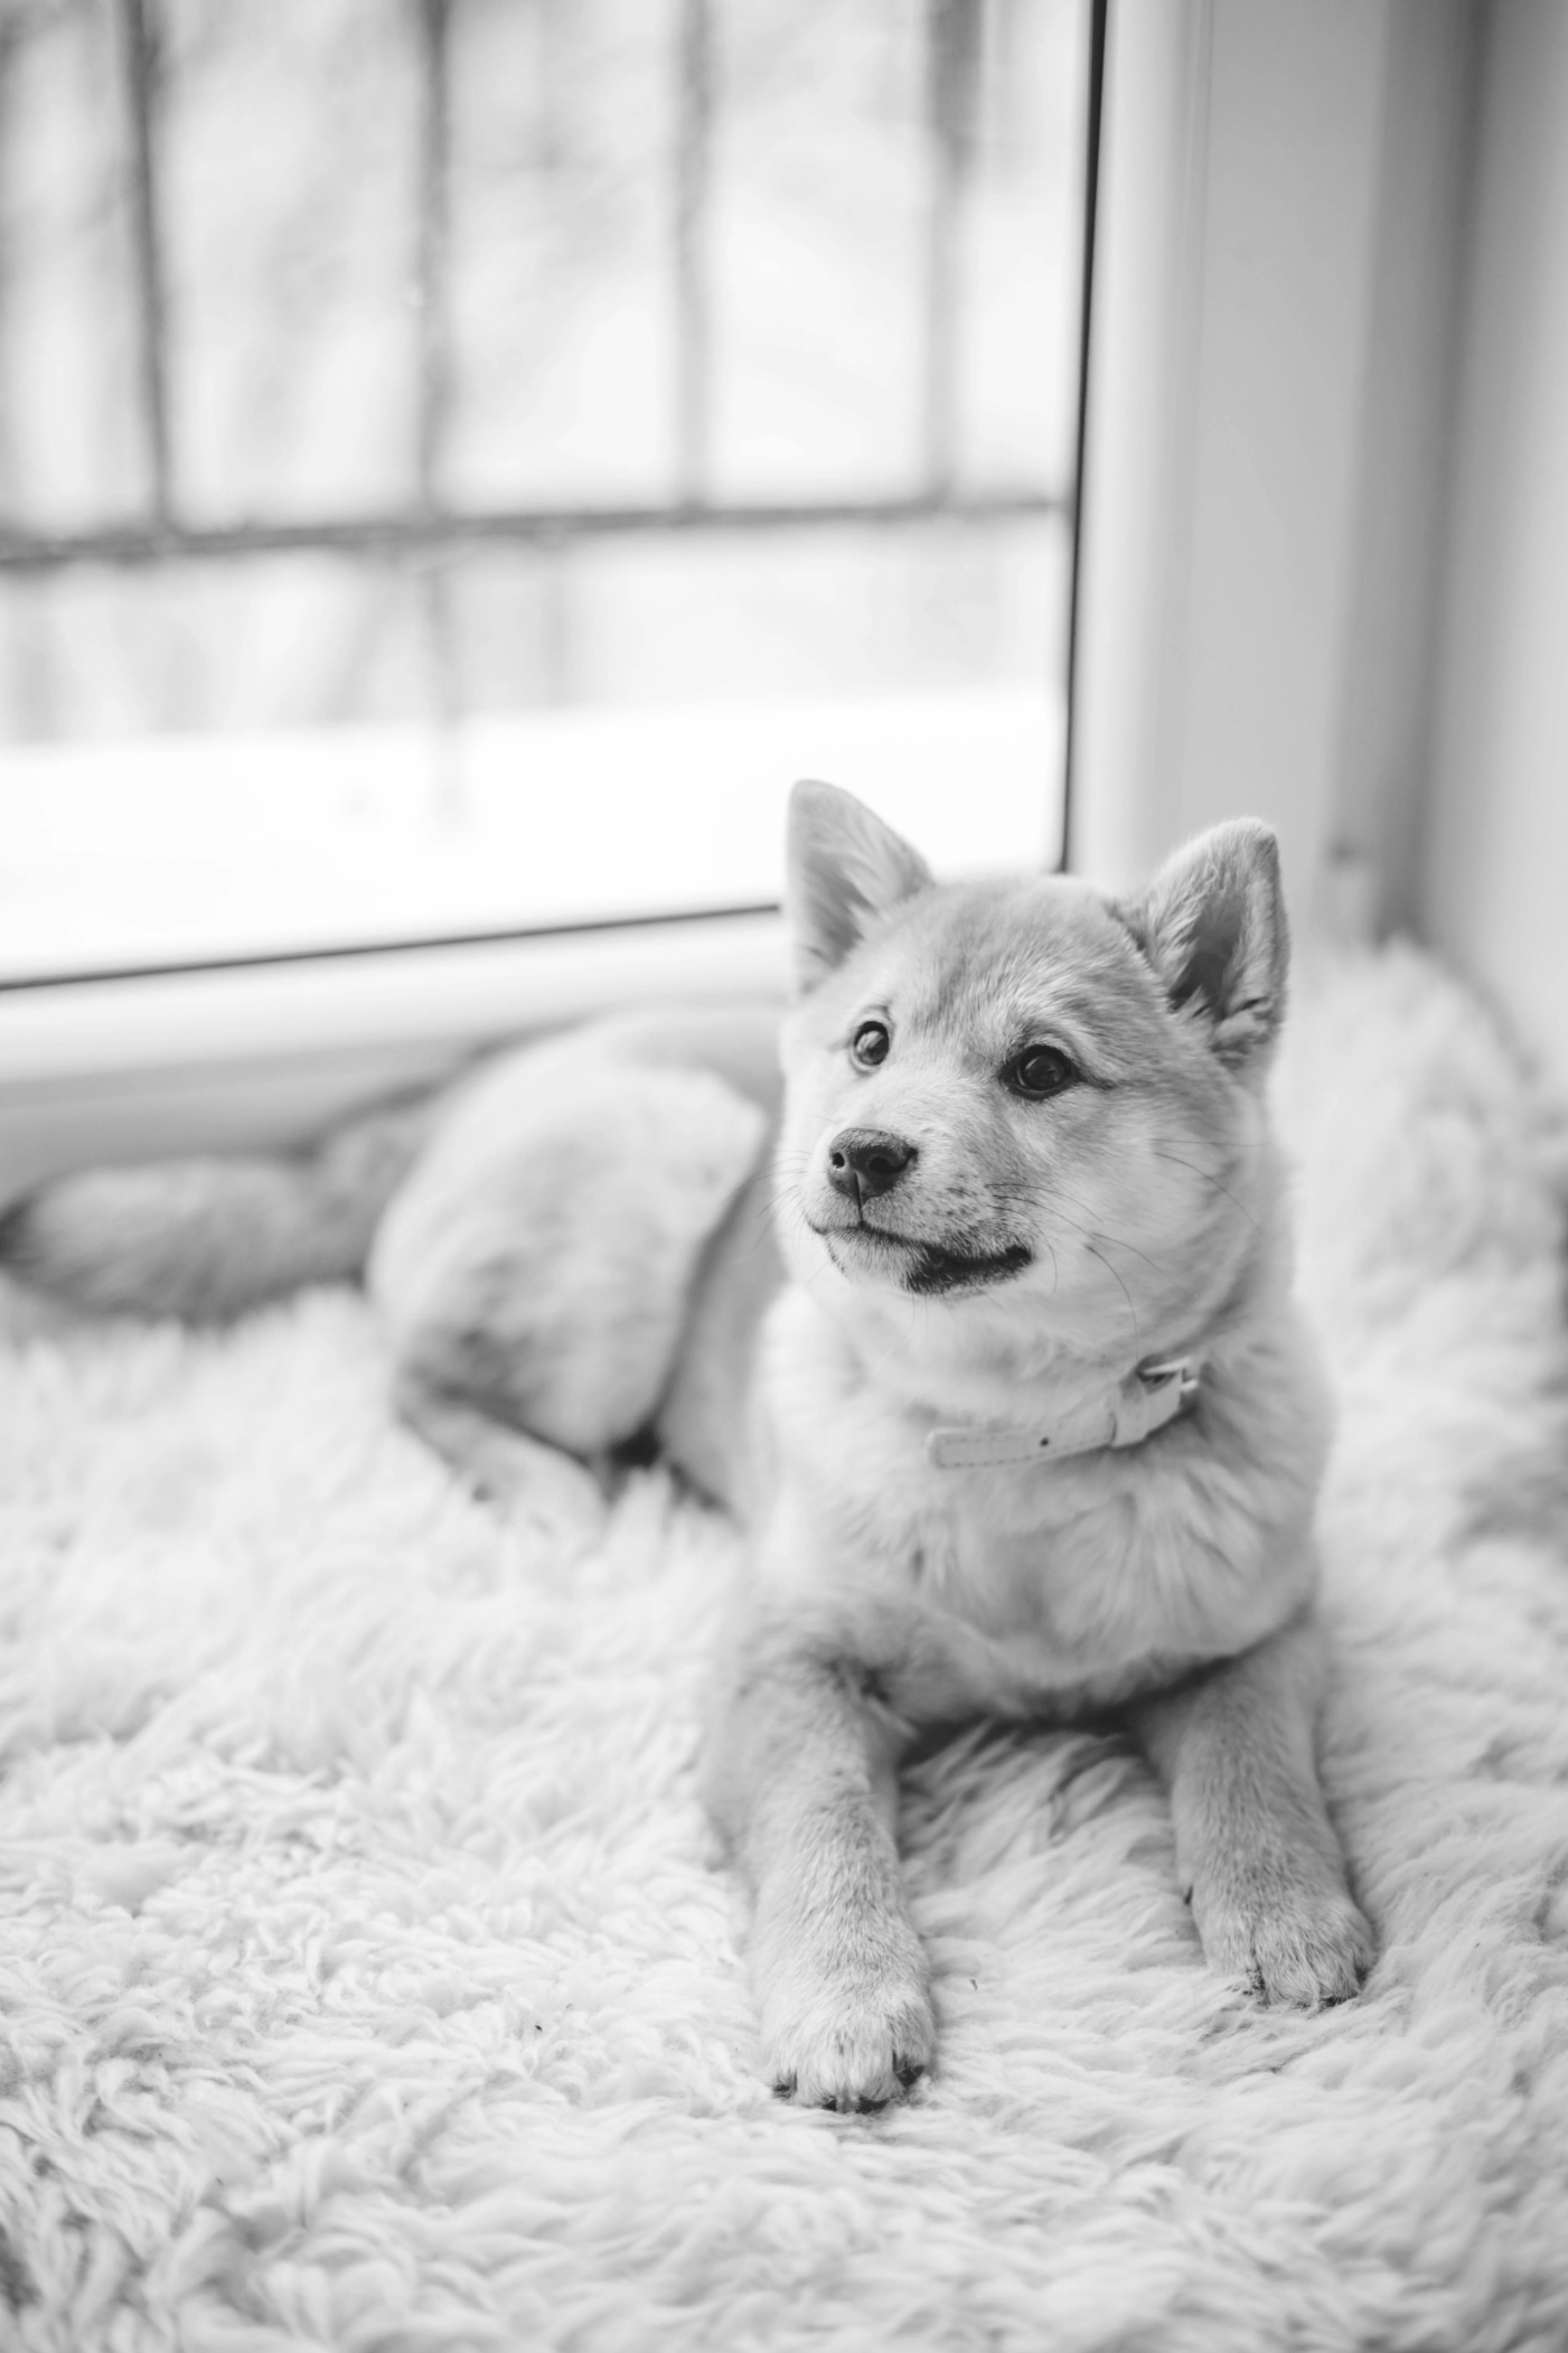

Output saved as reduced_resolution_5x5.jpg


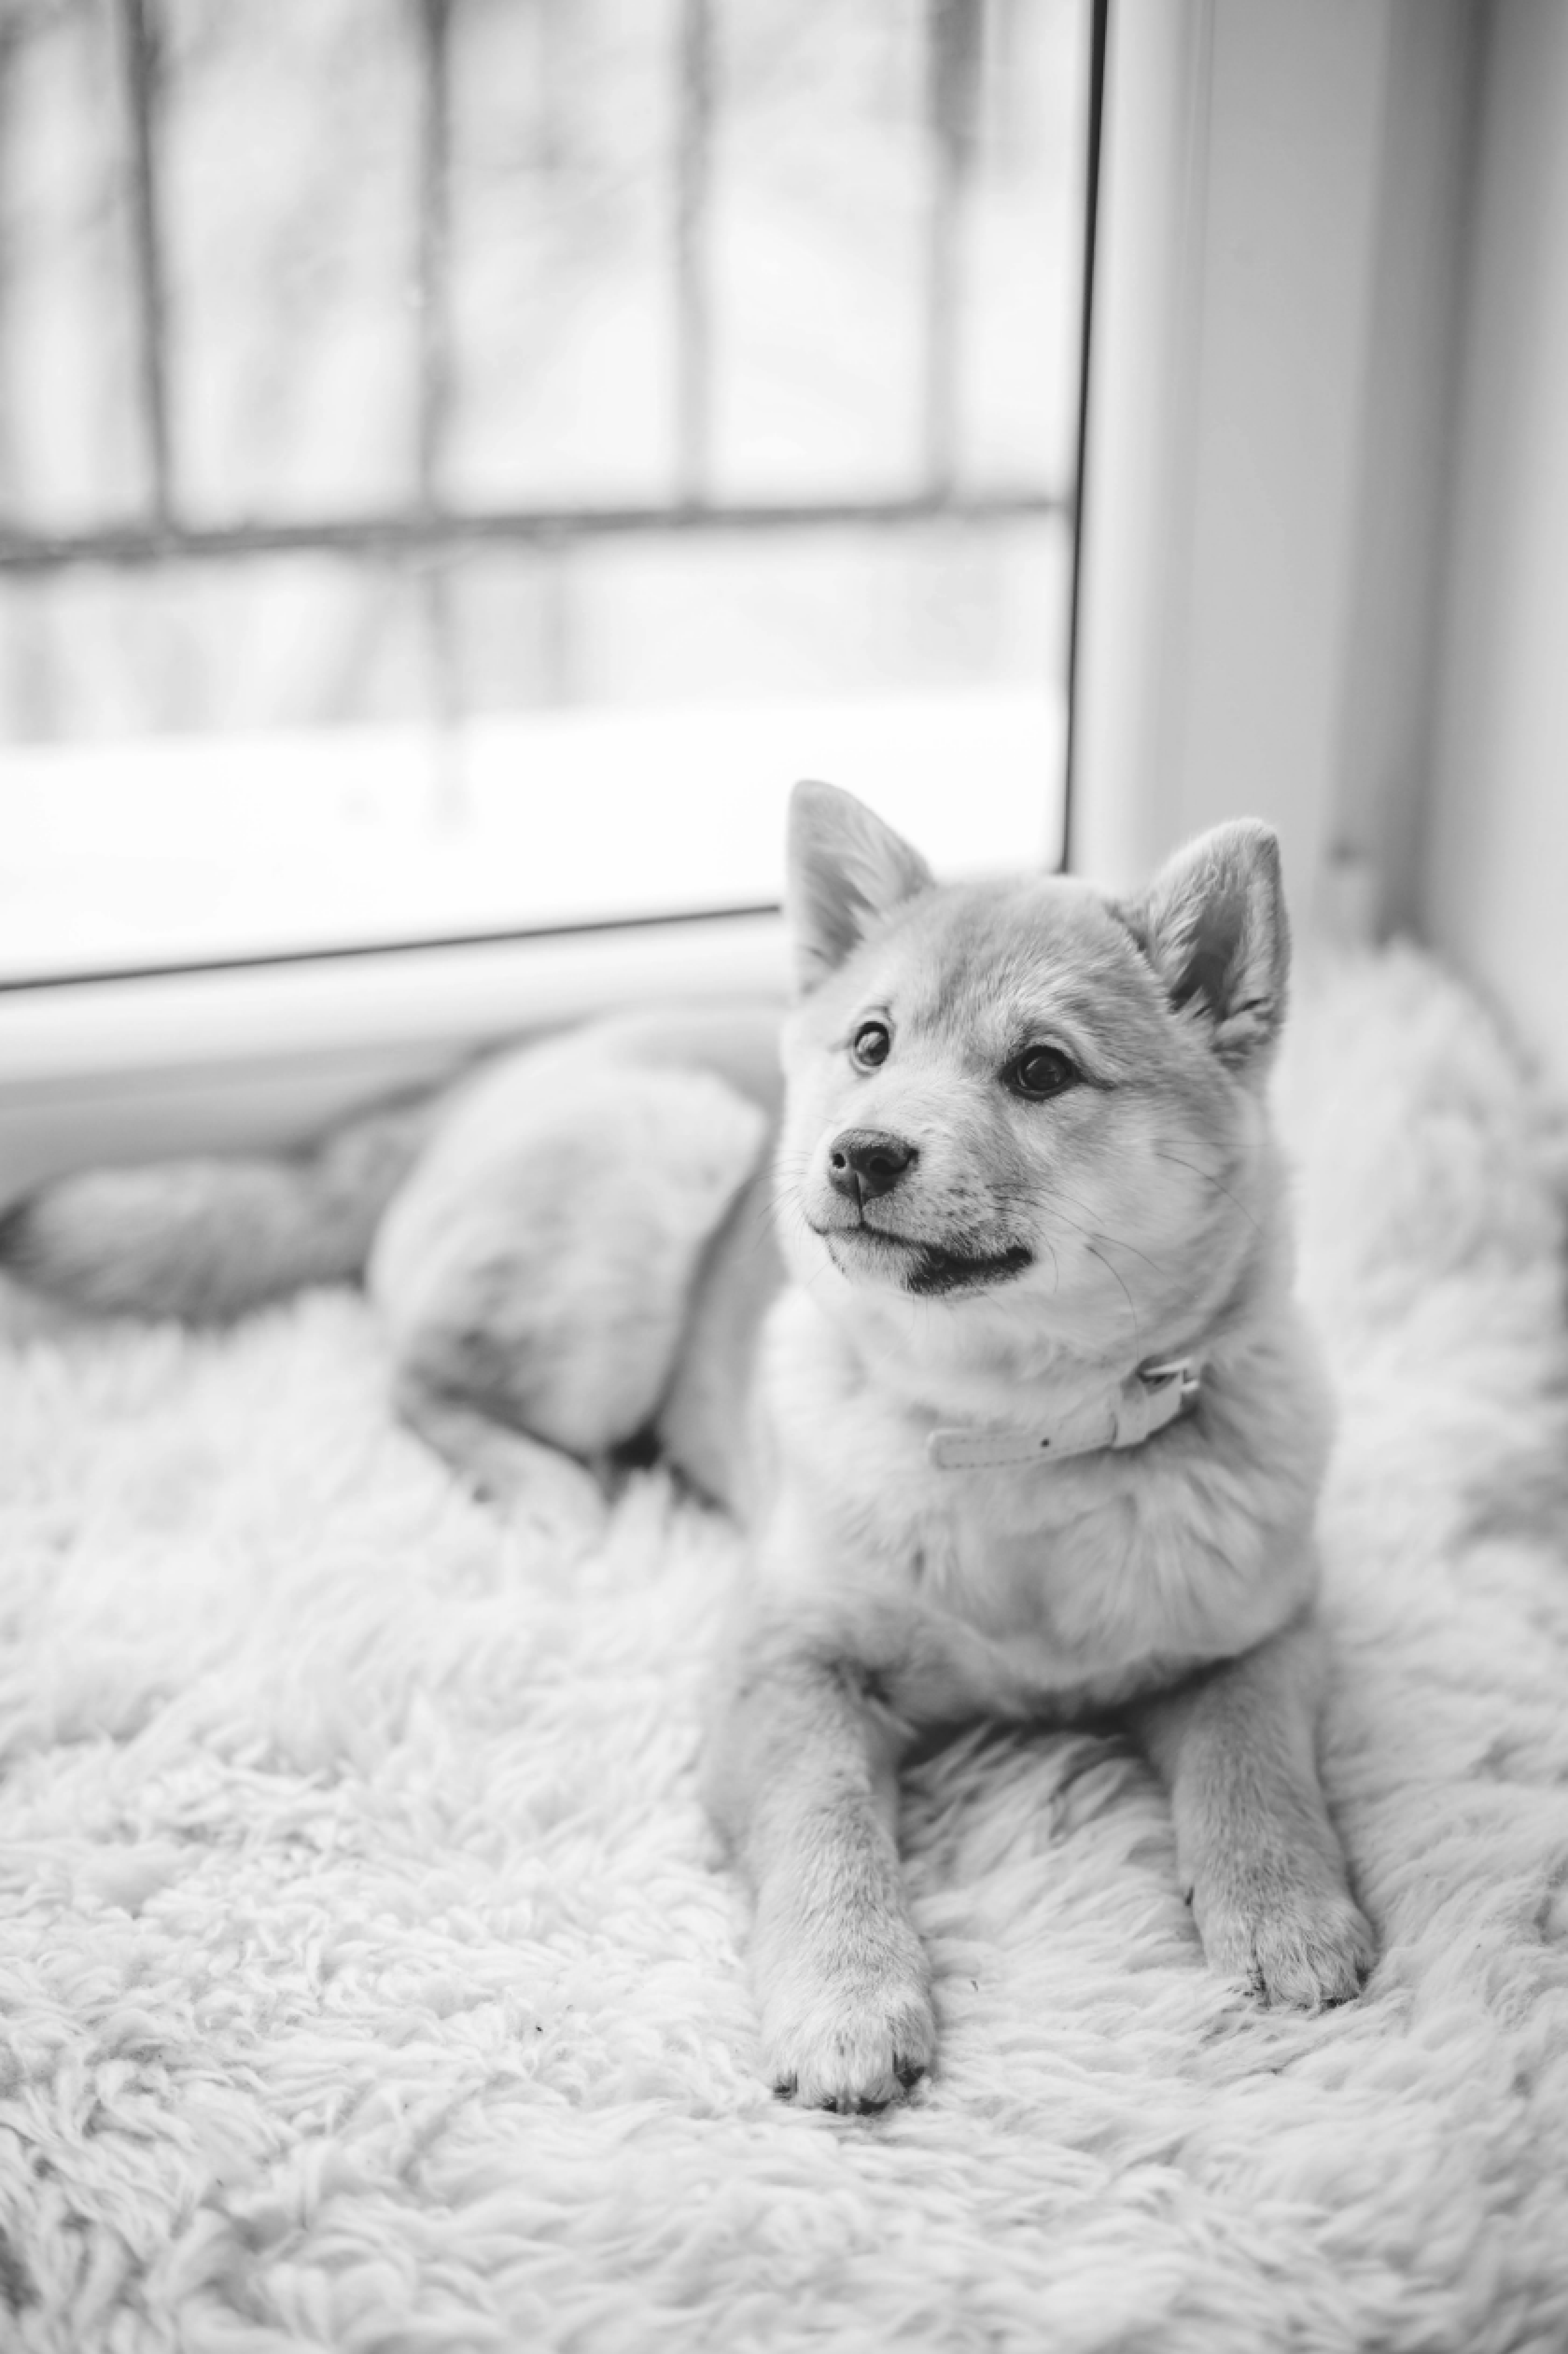

Output saved as reduced_resolution_7x7.jpg


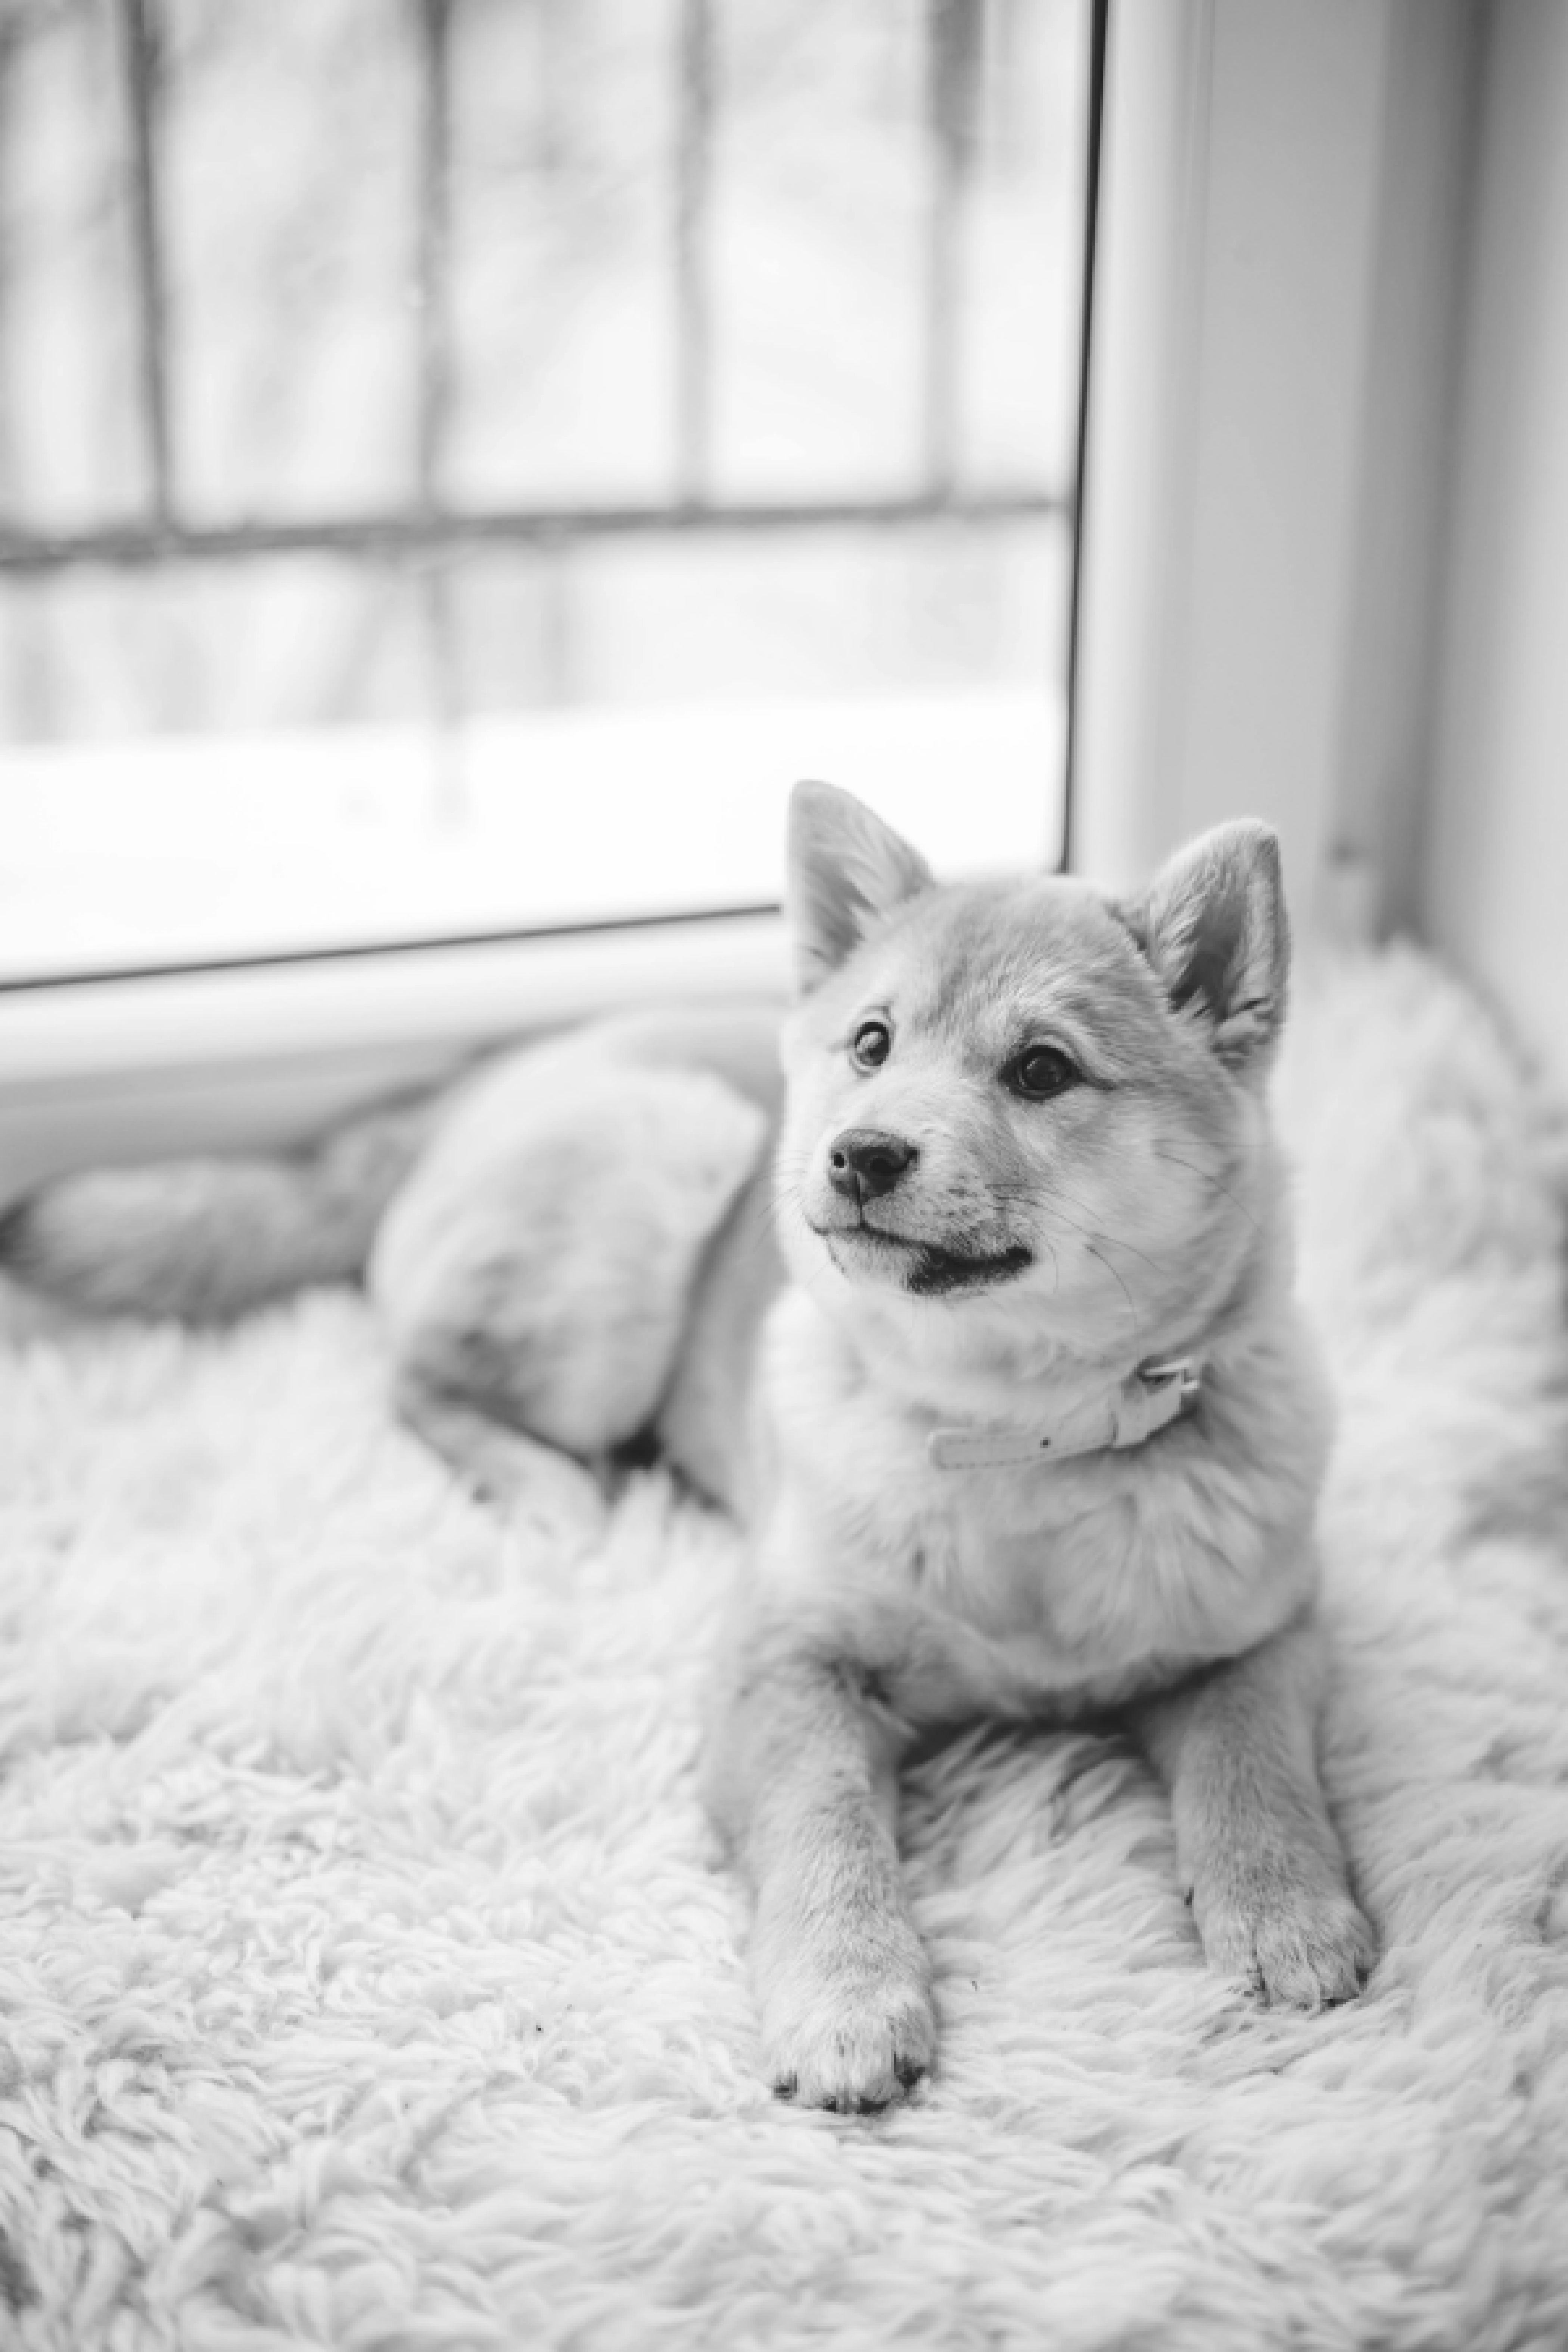

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
import io

def reduce_spatial_resolution(image, block_size):
    """
    Reduce spatial resolution by averaging over non-overlapping blocks.
    """
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    h, w = image.shape
    new_h, new_w = h // block_size, w // block_size

    # Initialize output image
    result = np.zeros((new_h * block_size, new_w * block_size), dtype=np.uint8)

    # Compute average for each block
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            # Extract block
            block = image[i:i+block_size, j:j+block_size]
            if block.shape == (block_size, block_size):
                # Compute average and assign to block
                avg = np.mean(block).astype(np.uint8)
                result[i:i+block_size, j:j+block_size] = avg

    return result

def main():
    # Prompt user to upload an image
    print("Please upload an image file (e.g., jpg, png):")
    uploaded = files.upload()

    # Check if an image was uploaded
    if not uploaded:
        raise FileNotFoundError("No image uploaded. Please upload an image file.")

    # Get the first uploaded file
    file_name = list(uploaded.keys())[0]
    image_data = uploaded[file_name]

    # Read the image from the uploaded data
    image = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("Failed to load the image. Ensure the file is a valid image format.")

    # Apply spatial resolution reduction for different block sizes
    block_sizes = [3, 5, 7]
    for size in block_sizes:
        result = reduce_spatial_resolution(image, size)
        output_file = f'reduced_resolution_{size}x{size}.jpg'
        cv2.imwrite(output_file, result)
        print(f"Output saved as {output_file}")
        cv2_imshow(result)

if __name__ == "__main__":
    main()